# Model Evaluation
This notebook will be used for further feature engineering. With the added feature engineering, the data will be used in the modeling and best parameters for the models will be chosen.
The flow of this notebook is as follows:

## Contents
* [Import libraries and load datasets](#chapter1)
    * [Import models](#chapter1_1)
    * [Load datasets and review](#chapter1_2)
* [Feature engineering](#chapter2)
    * [Drop collinear features](#chapter2_1)
    * [Drop features with low correlation with WNV](#chapter2_2)
    * [Engineer new features](#chapter2_3)
    * [Feature Engineer for test data](#chapter2_4)
* [Modeling](#chapter3)
    * [Create our features matrix (X) and target vector (y)](#chapter3_1)
    * [Baseline Score](#chapter3_2)
    * [Train Test Split](#chapter3_3)
    * [Scale Features](#chapter3_4)
    * [Imbalanced Classes](#chapter3_5)
    * [Logistic Regression](#chapter3_6)
    * [Gradient Boosting](#chapter3_7)
    * [Ada Boost](#chapter3_8)
    * [KNN](#chapter3_9)
    * [Random Forest](#chapter3_10)
    * [Decision Tree](#chapter3_11)

## Import libraries and load datasets <a class="anchor" id="chapter1"></a>

### Import libraries  <a class="anchor" id="chapter1_1"></a>

In [1]:
#import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Load datasets and review  <a class="anchor" id="chapter1_2"></a>

In [2]:
train = pd.read_csv('../dataset/train_merged.csv')

In [3]:
train.head()

,WnvPresent,WeekofYear,Sunrise,CULEX PIPIENS,Month,CULEX RESTUANS,DewPoint,WetBulb,Tmin,Longitude,Sunset,Tavg,Depart,Cool,FG,Heat,year,Tmax,BR,ResultSpeed,Station,TSRA,VCTS,CULEX TERRITANS,Latitude,AvgSpeed,HZ,RA,TS,CULEX SALINARIUS,StnPressure,CULEX PIPIENS/RESTUANS,SeaLevel,CULEX TARSALIS,PrecipTotal,ResultDir,DZ,CULEX ERRATICUS,MIFG
0,0,22,421,0,5,0,58,65.0,60,-87.800991,1917,74.0,10.0,9.0,0,0.0,2007,88,1,5.8,1,0,0,0,41.954690,6.5,1,0,0,0,29.39,1,30.11,0,0.0,18,0,0,0
1,0,22,421,0,5,1,58,65.0,60,-87.800991,1917,74.0,10.0,9.0,0,0.0,2007,88,1,5.8,1,0,0,0,41.954690,6.5,1,0,0,0,29.39,0,30.11,0,0.0,18,0,0,0
2,0,22,421,0,5,1,58,65.0,60,-87.769279,1917,74.0,10.0,9.0,0,0.0,2007,88,1,5.8,1,0,0,0,41.994991,6.5,1,0,0,0,29.39,0,30.11,0,0.0,18,0,0,0
3,0,22,421,0,5,0,58,65.0,60,-87.824812,1917,74.0,10.0,9.0,0,0.0,2007,88,1,5.8,1,0,0,0,41.974089,6.5,1,0,0,0,29.39,1,30.11,0,0.0,18,0,0,0
4,0,22,421,0,5,1,58,65.0,60,-87.824812,1917,74.0,10.0,9.0,0,0.0,2007,88,1,5.8,1,0,0,0,41.974089,6.5,1,0,0,0,29.39,0,30.11,0,0.0,18,0,0,0


## Feature Engineering <a class="anchor" id="chapter2"></a>

As seen in the EDA notebook, not all features are relevant in our predictive purpose. To prepare our training data for modelling, we will be selecting features that will be able to make our model more robust in predicting the West Nile Virus.

To select the best features, we will perform the following:

* Remove collinear features
* Remove features that have close to 0 correlation to WnvPresent
* Engineer new features

### Drop Collinear Features <a class="anchor" id="chapter2_1"></a>

* **Tavg** - We will use this feature as the main indicator of **temperature**, hence we will drop the following collinear features:
 * Tmin
 * Tmax
 * Depart(Depature from normal)
 * Heat(Heating)
 * Cool(Cooling)
 * Wetbulb  
 
*  **StnPressure(Average Station Pressure)** - We will use this feature as the main indicator of **pressure** from sources such as water and atmospheric.   
Hence we will drop collinear feature:  
 * SeaLevel(Average sea level pressure)  
 
* **ResultSpeed(Resultant Speed)** - We will use this feature as the main indicator of **wind** as it includes vector and magnitude.  
We will drop collinear feature:  
 * AvgSpeed

In [4]:
train.drop(columns = ['Tmin', 'Tmax','Depart', 'Heat', 'Cool', 'WetBulb',
                      'SeaLevel',
                      'AvgSpeed'], inplace=True)

In [5]:
train.head()

,WnvPresent,WeekofYear,Sunrise,CULEX PIPIENS,Month,CULEX RESTUANS,DewPoint,Longitude,Sunset,Tavg,FG,year,BR,ResultSpeed,Station,TSRA,VCTS,CULEX TERRITANS,Latitude,HZ,RA,TS,CULEX SALINARIUS,StnPressure,CULEX PIPIENS/RESTUANS,CULEX TARSALIS,PrecipTotal,ResultDir,DZ,CULEX ERRATICUS,MIFG
0,0,22,421,0,5,0,58,-87.800991,1917,74.0,0,2007,1,5.8,1,0,0,0,41.954690,1,0,0,0,29.39,1,0,0.0,18,0,0,0
1,0,22,421,0,5,1,58,-87.800991,1917,74.0,0,2007,1,5.8,1,0,0,0,41.954690,1,0,0,0,29.39,0,0,0.0,18,0,0,0
2,0,22,421,0,5,1,58,-87.769279,1917,74.0,0,2007,1,5.8,1,0,0,0,41.994991,1,0,0,0,29.39,0,0,0.0,18,0,0,0
3,0,22,421,0,5,0,58,-87.824812,1917,74.0,0,2007,1,5.8,1,0,0,0,41.974089,1,0,0,0,29.39,1,0,0.0,18,0,0,0
4,0,22,421,0,5,1,58,-87.824812,1917,74.0,0,2007,1,5.8,1,0,0,0,41.974089,1,0,0,0,29.39,0,0,0.0,18,0,0,0


### Drop features with low correlation with WNV <a class="anchor" id="chapter2_2"></a>

As per the heatmap in the EDA notebook, we will remove the remaining weather phenomna features with least correlation with West Nile Virus and are unpredictable.
* FG
* BR
* TSRA
* VCTS
* HZ
* RA
* TS
* DZ
* MIFG

In [6]:
train.drop(columns = ['FG', 'BR', 'TSRA', 
                      'VCTS', 'HZ', 'RA',
                      'TS', 'DZ', 'MIFG'
                      ], inplace=True)

In [7]:
train.head()

,WnvPresent,WeekofYear,Sunrise,CULEX PIPIENS,Month,CULEX RESTUANS,DewPoint,Longitude,Sunset,Tavg,year,ResultSpeed,Station,CULEX TERRITANS,Latitude,CULEX SALINARIUS,StnPressure,CULEX PIPIENS/RESTUANS,CULEX TARSALIS,PrecipTotal,ResultDir,CULEX ERRATICUS
0,0,22,421,0,5,0,58,-87.800991,1917,74.0,2007,5.8,1,0,41.954690,0,29.39,1,0,0.0,18,0
1,0,22,421,0,5,1,58,-87.800991,1917,74.0,2007,5.8,1,0,41.954690,0,29.39,0,0,0.0,18,0
2,0,22,421,0,5,1,58,-87.769279,1917,74.0,2007,5.8,1,0,41.994991,0,29.39,0,0,0.0,18,0
3,0,22,421,0,5,0,58,-87.824812,1917,74.0,2007,5.8,1,0,41.974089,0,29.39,1,0,0.0,18,0
4,0,22,421,0,5,1,58,-87.824812,1917,74.0,2007,5.8,1,0,41.974089,0,29.39,0,0,0.0,18,0


### Engineer New Features <a class="anchor" id="chapter2_3"></a>
source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342965/

Based on our online research, while most of the weather features in the dataset have correlation with the West Nile Virus, we have found that there is a positive correlation between **Relative Humidity** and vector population dynamics of mosquito species and morbidity(degradation in health) in humans. Hence we will include engineer this feature into our dataset.


Source for calculation:
* https://www.wikihow.com/Calculate-Humidity  
* https://sciencing.com/relative-humidity-7611453.html

In [8]:
#convert average temperature from farenheit to degree celsius
t_avg_cel = (5/9) * (train['Tavg']-32)

#convert dewpoint from farenheit to degree celsius
dewpoint_cel = (5/9) * (train['DewPoint']-32)

#calculate saturated vapor pressure
sat_pre = 6.11*10*((7.5*t_avg_cel) / (237.3+t_avg_cel))

#calculate actual vapor pressure
act_pre = 6.11*10*((7.5*dewpoint_cel) / (237.3+dewpoint_cel))

rel_humid = (act_pre/sat_pre) * 100

train['Rela_Humidity'] = rel_humid

In [9]:
train.head()

,WnvPresent,WeekofYear,Sunrise,CULEX PIPIENS,Month,CULEX RESTUANS,DewPoint,Longitude,Sunset,Tavg,year,ResultSpeed,Station,CULEX TERRITANS,Latitude,CULEX SALINARIUS,StnPressure,CULEX PIPIENS/RESTUANS,CULEX TARSALIS,PrecipTotal,ResultDir,CULEX ERRATICUS,Rela_Humidity
0,0,22,421,0,5,0,58,-87.800991,1917,74.0,2007,5.8,1,0,41.954690,0,29.39,1,0,0.0,18,0,64.090568
1,0,22,421,0,5,1,58,-87.800991,1917,74.0,2007,5.8,1,0,41.954690,0,29.39,0,0,0.0,18,0,64.090568
2,0,22,421,0,5,1,58,-87.769279,1917,74.0,2007,5.8,1,0,41.994991,0,29.39,0,0,0.0,18,0,64.090568
3,0,22,421,0,5,0,58,-87.824812,1917,74.0,2007,5.8,1,0,41.974089,0,29.39,1,0,0.0,18,0,64.090568
4,0,22,421,0,5,1,58,-87.824812,1917,74.0,2007,5.8,1,0,41.974089,0,29.39,0,0,0.0,18,0,64.090568


For Sunrise and the Sunset features, we will engineer the **Daylight Hours**. As per our research, mosquitoes are generally more active at higher temperatures, which allow vectors to grow rapidly espiecially in regions like North America and Europe. 

Thus computing daylight hours will allow us to understand if higher temperature during the day of longer days will affect the presence of West Nile Virus.

We will then drop the sunset column due to its collinearity

In [10]:
train['Daylight_Hours'] = (train['Sunset'] - train['Sunrise'])/100
train.drop(columns = ['Sunset'], inplace=True)
train.head()

,WnvPresent,WeekofYear,Sunrise,CULEX PIPIENS,Month,CULEX RESTUANS,DewPoint,Longitude,Tavg,year,ResultSpeed,Station,CULEX TERRITANS,Latitude,CULEX SALINARIUS,StnPressure,CULEX PIPIENS/RESTUANS,CULEX TARSALIS,PrecipTotal,ResultDir,CULEX ERRATICUS,Rela_Humidity,Daylight_Hours
0,0,22,421,0,5,0,58,-87.800991,74.0,2007,5.8,1,0,41.954690,0,29.39,1,0,0.0,18,0,64.090568,14.96
1,0,22,421,0,5,1,58,-87.800991,74.0,2007,5.8,1,0,41.954690,0,29.39,0,0,0.0,18,0,64.090568,14.96
2,0,22,421,0,5,1,58,-87.769279,74.0,2007,5.8,1,0,41.994991,0,29.39,0,0,0.0,18,0,64.090568,14.96
3,0,22,421,0,5,0,58,-87.824812,74.0,2007,5.8,1,0,41.974089,0,29.39,1,0,0.0,18,0,64.090568,14.96
4,0,22,421,0,5,1,58,-87.824812,74.0,2007,5.8,1,0,41.974089,0,29.39,0,0,0.0,18,0,64.090568,14.96


### Feature Engineer for Test Data <a class="anchor" id="chapter2_4"></a>

In [11]:
test = pd.read_csv('../dataset/test_merged.csv')
test.head()

,WeekofYear,Sunrise,CULEX PIPIENS,Month,CULEX RESTUANS,DewPoint,WetBulb,Tmin,Longitude,Sunset,Tavg,Depart,Cool,FG,Heat,year,Tmax,BR,ResultSpeed,Station,TSRA,VCTS,CULEX TERRITANS,Latitude,AvgSpeed,HZ,RA,TS,CULEX SALINARIUS,StnPressure,CULEX PIPIENS/RESTUANS,SeaLevel,CULEX TARSALIS,PrecipTotal,ResultDir,DZ,CULEX ERRATICUS,MIFG
0,24,416,0,6,0,56,64.0,61,-87.800991,1926,74.0,7.0,9.0,0,0.0,2008,86,0,8.9,1,0,0,0,41.95469,10.0,0,0,0,0,29.28,1,29.99,0,0.0,18,0,0,0
1,24,416,0,6,1,56,64.0,61,-87.800991,1926,74.0,7.0,9.0,0,0.0,2008,86,0,8.9,1,0,0,0,41.95469,10.0,0,0,0,0,29.28,0,29.99,0,0.0,18,0,0,0
2,24,416,1,6,0,56,64.0,61,-87.800991,1926,74.0,7.0,9.0,0,0.0,2008,86,0,8.9,1,0,0,0,41.95469,10.0,0,0,0,0,29.28,0,29.99,0,0.0,18,0,0,0
3,24,416,0,6,0,56,64.0,61,-87.800991,1926,74.0,7.0,9.0,0,0.0,2008,86,0,8.9,1,0,0,0,41.95469,10.0,0,0,0,1,29.28,0,29.99,0,0.0,18,0,0,0
4,24,416,0,6,0,56,64.0,61,-87.800991,1926,74.0,7.0,9.0,0,0.0,2008,86,0,8.9,1,0,0,1,41.95469,10.0,0,0,0,0,29.28,0,29.99,0,0.0,18,0,0,0


In [12]:
#repeat same steps
test.drop(columns = ['Tmin', 'Tmax','Depart', 'Heat', 'Cool', 'WetBulb',
                      'SeaLevel',
                      'AvgSpeed'], inplace=True)

test.drop(columns = ['FG', 'BR', 'TSRA', 
                      'VCTS', 'HZ', 'RA',
                      'TS', 'DZ', 'MIFG'
                      ], inplace=True)

In [13]:
#convert average temperature from farenheit to degree celsius
t_avg_cel = (5/9) * (test['Tavg']-32)

#convert dewpoint from farenheit to degree celsius
dewpoint_cel = (5/9) * (test['DewPoint']-32)

#calculate saturated vapor pressure
sat_pre = 6.11*10*((7.5*t_avg_cel) / (237.3+t_avg_cel))

#calculate actual vapor pressure
act_pre = 6.11*10*((7.5*dewpoint_cel) / (237.3+dewpoint_cel))

rel_humid = (act_pre/sat_pre) * 100

test['Rela_Humidity'] = rel_humid

In [14]:
test['Daylight_Hours'] = (test['Sunset'] - test['Sunrise'])/100
test.drop(columns = ['Sunset'], inplace=True)
test.head()

,WeekofYear,Sunrise,CULEX PIPIENS,Month,CULEX RESTUANS,DewPoint,Longitude,Tavg,year,ResultSpeed,Station,CULEX TERRITANS,Latitude,CULEX SALINARIUS,StnPressure,CULEX PIPIENS/RESTUANS,CULEX TARSALIS,PrecipTotal,ResultDir,CULEX ERRATICUS,Rela_Humidity,Daylight_Hours
0,24,416,0,6,0,56,-87.800991,74.0,2008,8.9,1,0,41.95469,0,29.28,1,0,0.0,18,0,59.422796,15.1
1,24,416,0,6,1,56,-87.800991,74.0,2008,8.9,1,0,41.95469,0,29.28,0,0,0.0,18,0,59.422796,15.1
2,24,416,1,6,0,56,-87.800991,74.0,2008,8.9,1,0,41.95469,0,29.28,0,0,0.0,18,0,59.422796,15.1
3,24,416,0,6,0,56,-87.800991,74.0,2008,8.9,1,0,41.95469,1,29.28,0,0,0.0,18,0,59.422796,15.1
4,24,416,0,6,0,56,-87.800991,74.0,2008,8.9,1,1,41.95469,0,29.28,0,0,0.0,18,0,59.422796,15.1


In [15]:
#train will have 1 more column which is our target variable
print(train.shape)
print(test.shape)

(9693, 23)
(116293, 22)


In [16]:
#Export clean train/test dataset
train.to_csv("../dataset/train_final.csv", index = False)
test.to_csv("../dataset/test_final.csv", index = False)

## Modeling <a class="anchor" id="chapter3"></a>

### Create our features matrix (X) and target vector (y) <a class="anchor" id="chapter3_1"></a>

In [17]:
# To get the features for X
features = [col for col in train if col != 'WnvPresent']
features

['WeekofYear',
 'Sunrise',
 'CULEX PIPIENS',
 'Month',
 'CULEX RESTUANS',
 'DewPoint',
 'Longitude',
 'Tavg',
 'year',
 'ResultSpeed',
 'Station',
 'CULEX TERRITANS',
 'Latitude',
 'CULEX SALINARIUS',
 'StnPressure',
 'CULEX PIPIENS/RESTUANS',
 'CULEX TARSALIS',
 'PrecipTotal',
 'ResultDir',
 'CULEX ERRATICUS',
 'Rela_Humidity',
 'Daylight_Hours']

In [18]:
X = train[features]
y = train.WnvPresent

### Baseline Score <a class="anchor" id="chapter3_2"></a>

In [19]:
train['WnvPresent'].value_counts(normalize=True)

0    0.948107
1    0.051893
Name: WnvPresent, dtype: float64

### Train Test Split  <a class="anchor" id="chapter3_3"></a>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size =0.25, random_state = 42)

In [21]:
X_train_columns = X_train.columns

###  Scale Features <a class="anchor" id="chapter3_4"></a>

In [22]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Imbalanced Classes <a class="anchor" id="chapter3_5"></a>

In [23]:
#use smote to deal with imbalanced classes
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_sample(X_train, y_train)

### Logistic Regression <a class="anchor" id="chapter3_6"></a>

In [24]:
lr = LogisticRegression()
pipe_params = {'solver' : ['liblinear'],
               'penalty': ['l1', 'l2'],
               'C': np.logspace(-5, 1, 50)
                }
gs = GridSearchCV(lr, param_grid=pipe_params, scoring='roc_auc', cv=5, return_train_score= True, verbose=1)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7907689735439872


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   52.5s finished


{'C': 0.4498432668969444, 'penalty': 'l2', 'solver': 'liblinear'}

In [25]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.7922106249004204, 0.7925991545443243)

In [26]:
preds = gs.predict(X_test)

### GradientBoosting <a class="anchor" id="chapter3_7"></a>

In [27]:
gbc = GradientBoostingClassifier()
pipe_params_gbc = {
                'learning_rate': [0.1,0.5,0.7],
                'max_depth': [2,3,5,6],
                'n_estimators': [700,800,900]
                }
gs_gbc = GridSearchCV(gbc, param_grid=pipe_params_gbc, scoring='roc_auc', cv=3, return_train_score= True, verbose=1)
gs_gbc.fit(X_train, y_train)
print(gs_gbc.best_score_)
gs_gbc.best_params_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 37.0min finished


0.9921407039852485


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 800}

In [28]:
gs_gbc.score(X_train, y_train), gs_gbc.score(X_test, y_test)

(0.9995472704817449, 0.8570202522552393)

In [29]:
best_gbc = gs_gbc.best_estimator_
preds_gbc = best_gbc.predict(X_test)

### AdaBoost  <a class="anchor" id="chapter3_8"></a>

In [31]:
ada = AdaBoostClassifier()
pipe_params_ada = {
                'learning_rate': [0.8, 0.9, 1.0],
                'n_estimators': [700, 800, 900]
                }
# gs_ada = GridSearchCV(ada, param_grid=pipe_params_ada, scoring='roc_auc', cv=5, return_train_score= True, n_jobs = -1, verbose=1)
gs_ada = GridSearchCV(ada, param_grid=pipe_params_ada, scoring='roc_auc', cv=5, return_train_score= True, verbose=1)
gs_ada.fit(X_train, y_train)
print(gs_ada.best_score_)
gs_ada.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  9.0min finished


0.9693788465887797


{'learning_rate': 1.0, 'n_estimators': 900}

In [32]:
gs_ada.score(X_train, y_train), gs_ada.score(X_test, y_test)

(0.9744103347762628, 0.8463829831323304)

In [33]:
best_ada = gs_ada.best_estimator_
preds_ada = best_ada.predict(X_test)

### KNN <a class="anchor" id="chapter3_9"></a>

In [34]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors': range(5,20),
    'weights':['uniform'],
     'algorithm': ['auto']
}
gs_knn = GridSearchCV(knn, param_grid = params, scoring='roc_auc', verbose=1, return_train_score=True)
gs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  4.4min finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'n_neighbors': range(5, 20),
                         'weights': ['uniform']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [35]:
gs_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

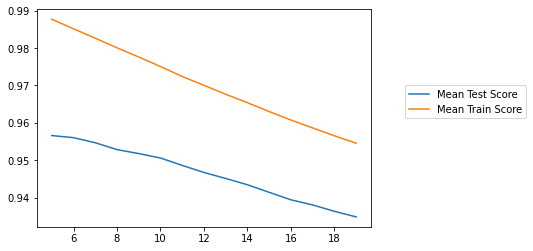

In [36]:
mtest, mtrain = gs_knn.cv_results_['mean_test_score'], gs_knn.cv_results_['mean_train_score']
plt.plot(params['n_neighbors'], mtest, label='Mean Test Score')
plt.plot(params['n_neighbors'], mtrain, label='Mean Train Score')
plt.legend(loc=(1.1, .5));

In [37]:
gs_knn.score(X_train, y_train), gs_knn.score(X_test, y_test)

(0.9891080492695696, 0.7750562946385401)

In [38]:
cross_val_score(knn, X_train, y_train, cv=5).mean()

NameError: name 'cross_val_score' is not defined

In [ ]:
cross_val_score(knn, X_test, y_test, cv=5).mean()

In [ ]:
best_knn = gs_knn.best_estimator_
preds_knn = best_knn.predict(X_test)

## Random Forest  <a class="anchor" id="chapter3_10"></a>

In [ ]:
params = {
    'min_samples_split': [3],
    'min_samples_leaf': range(5, 20, 1),
    'class_weight': ['balanced'],
    'n_estimators': [1000]
}

gs_rf = GridSearchCV(RandomForestClassifier(bootstrap=True), param_grid=params, scoring='roc_auc', verbose=1)

In [ ]:
gs_rf.fit(X_train, y_train)

In [ ]:
gs_rf.score(X_train, y_train), gs_rf.score(X_test, y_test)

In [ ]:
pd.Series(gs_rf.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)

In [ ]:
gs_rf.best_params_

### Decision Tree <a class="anchor" id="chapter3_11"></a>

In [ ]:
params = {
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'max_depth': range(10, 20),
    'class_weight' : ['balanced'],
    'max_features': ['auto', None],
    'random_state': [42],
}

gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='roc_auc')

In [ ]:
gs_dt.fit(X_train, y_train)

In [ ]:
gs_dt.score(X_train, y_train), gs_dt.score(X_test, y_test)

In [ ]:
gs_dt.best_params_